#**GDG TASK 2**



Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding.

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [1]:
!pip install shap -q  #Will be used later on

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount your Google Drive using the cell below.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [4]:
df_crab = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Task1.csv')


In [5]:
df_crab.shape

(74051, 10)

Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [10]:
# Your code starts here
def crab_processing(df):
  if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
  df = df[df['Height'] !=0]
  df['LostWeight'] = df['Weight'] - (df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight'])
  df.loc[df['LostWeight']<0,'LostWeight'] = 0
  df.loc[df['LostWeight']>=0,'LostWeight'] = 1
  df = pd.get_dummies(df, columns=['Sex'])
  return df

df_crab = crab_processing(df_crab)
df_crab.head()
# Your code ends here

<ipython-input-10-db29e26e75cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LostWeight'] = df['Weight'] - (df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight'])


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,LostWeight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1.0,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,1.0,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,1.0,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1.0,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1.0,False,True,False


If all is correct, this should be the shape of your df now.

In [11]:
df_crab.shape

(74027, 12)

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

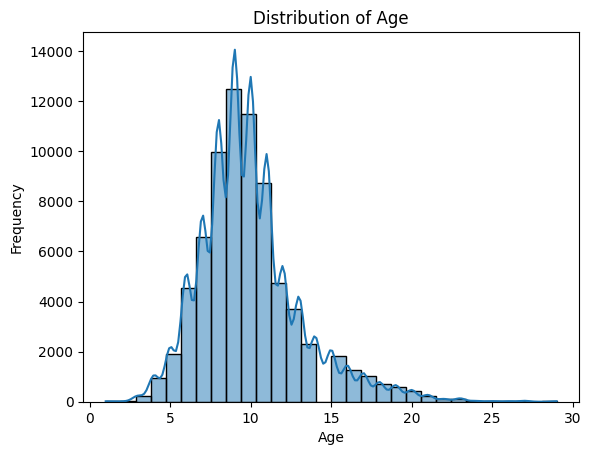

In [12]:
sns.histplot(x='Age', data=df_crab, kde=True, bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [15]:
# Your code starts here
X  = df_crab.drop('Age', axis=1)  # All columns except 'Age'
y = df_crab[['Age']]           # Only the 'Age' column
# Your code ends here

In [16]:
# This code should print (74027, 11) and (74027, 1) if everything is correct
print(X.shape,y.shape)

(74027, 11) (74027, 1)


In [18]:
#Print a few records of X
X.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,LostWeight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1.0,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1.0,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1.0,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1.0,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1.0,False,True,False


In [19]:
#Print a few records of y
y.head()

,Age
0,9
1,8
2,9
3,11
4,8


###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [20]:
# Import train_test_split Hint: Use sklearn.model_selection
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [21]:
# Your code starts here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
# Your code ends here

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [22]:
# Your code starts here
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
# Your code ends here

X_train shape: (51818, 11)
X_test shape: (22209, 11)
y_train shape: (51818, 1)
y_test shape: (22209, 1)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [23]:
# Add your import statement here
from sklearn.svm import SVR
# Create an SVR object 'svr' by calling SVR()
svr = SVR()

Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [24]:
# Your code starts here
svr.fit(X_train, y_train)
# Your code ends here

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22009,) if everything is correct.

In [25]:
# Your code starts here
predictions = svr.predict(X_test)
print(type(predictions))
print(predictions.shape)

# Your code ends here

<class 'numpy.ndarray'>
(22209,)


Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

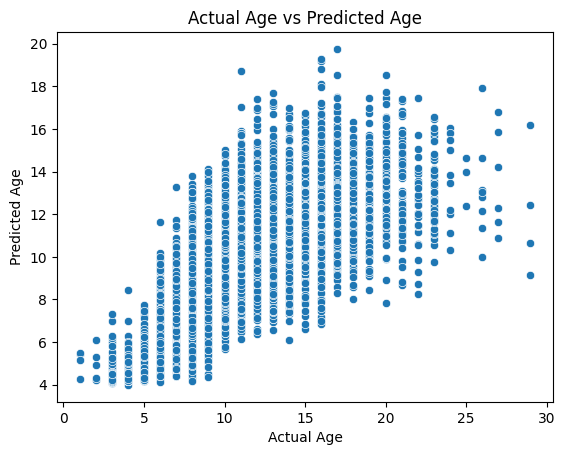

In [26]:
# Your code starts here
sns.scatterplot(x=y_test['Age'], y=predictions)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual Age vs Predicted Age')
plt.show()
# Your code ends here

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [27]:
# Your code starts here
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))
# Your code ends here

0.5533042847554788


In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

Your text here




 **Model Evaluation:** R² Score Analysis

The model achieved an R² score of **0.553** on the crab age prediction dataset. The R² score, or the coefficient of determination, quantifies how well a model explains the variance in the target variable. Specifically, an R² score of 0.553 indicates that **55.3% of the variability in crab age can be explained by our model** based on the given features, while the remaining 44.7% of the variability is unexplained.





In [28]:
#Explore additional metrics here
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))

4.502053859337484
1.3965405339135315


You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

Your text here### Alternative Regression Models

1. **Decision Tree Regression**:
   - **How it Works**: Decision Tree Regression uses a tree-like structure where the dataset is repeatedly split into subsets based on feature values. The splits are chosen to minimize variance within each subset, ultimately creating regions that correspond to predicted values.
  

2. **Random Forest Regression**:
   - **How it Works**: Random Forest is an ensemble method that builds multiple decision trees on different subsets of the dataset and averages their predictions to improve accuracy and reduce overfitting. Each tree is trained on a random sample of data and features, making the model more robust.


3. **K-Nearest Neighbors (KNN) Regression**:
   - **How it Works**: KNN Regression predicts the value of a data point based on the average of the values of its *k* nearest neighbors. It calculates distances between data points and assigns a prediction by averaging the target values of the closest neighbors.
  

###Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [29]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

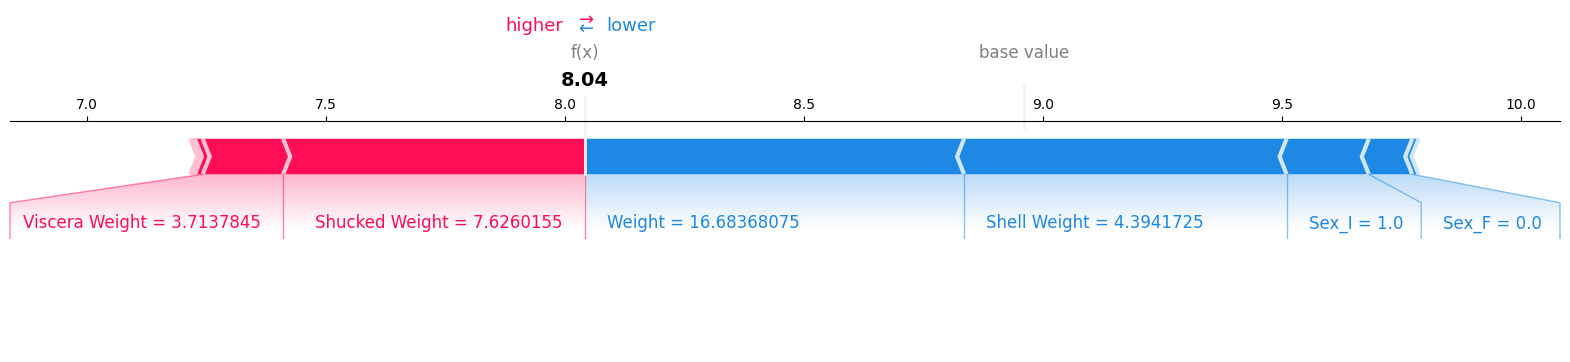

In [30]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classified_data.txt',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [32]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [33]:
#describe()
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

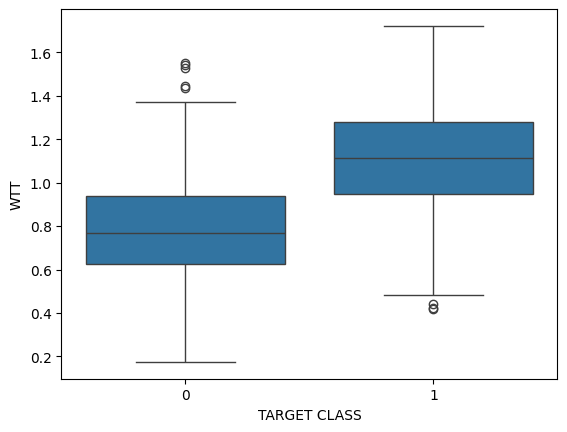

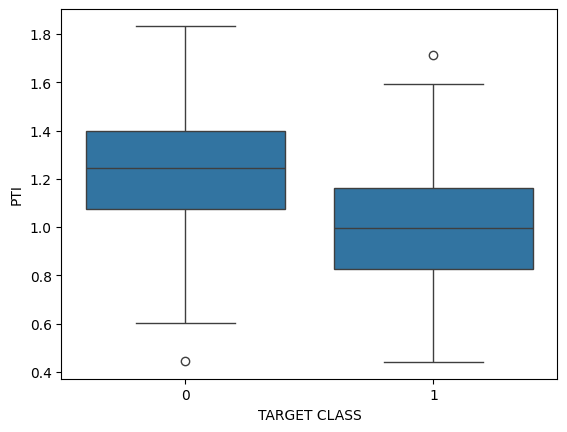

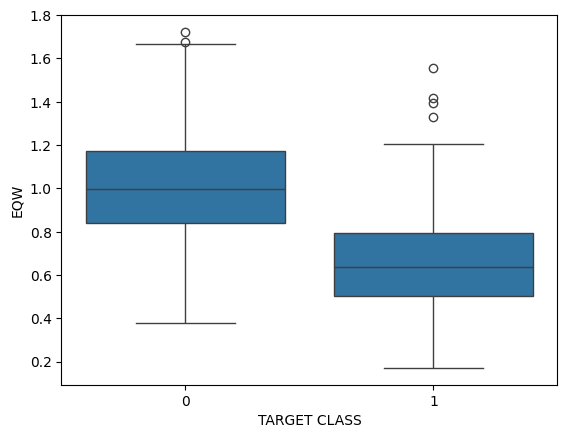

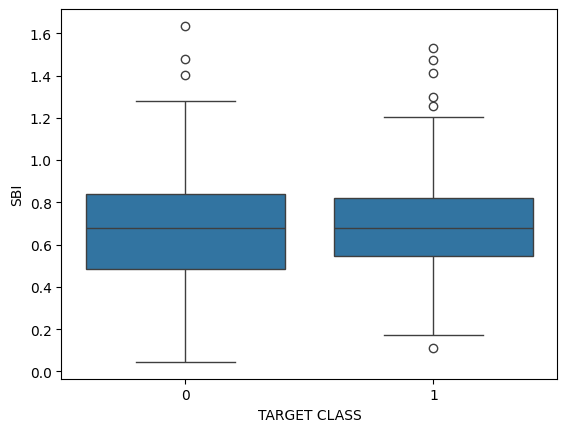

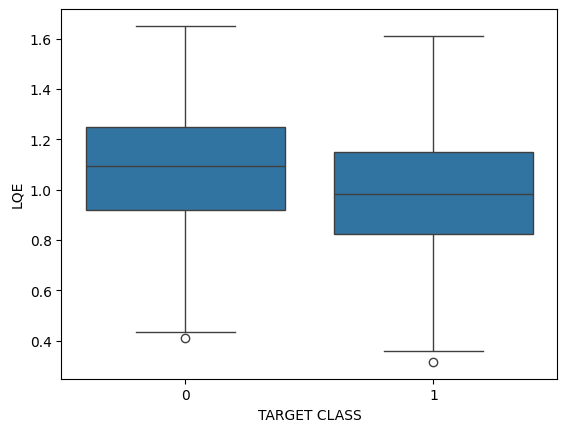

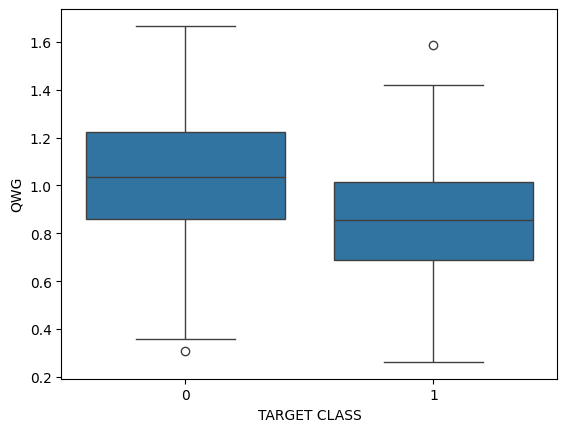

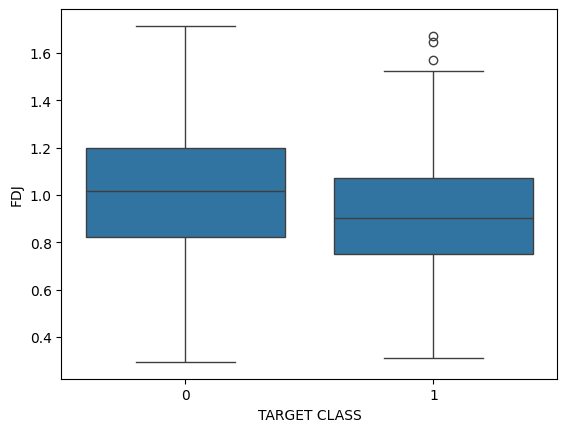

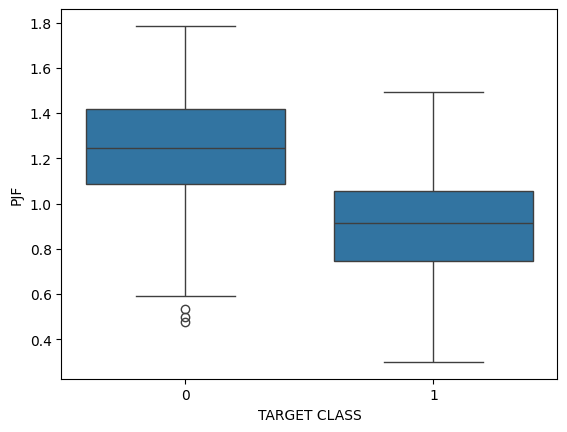

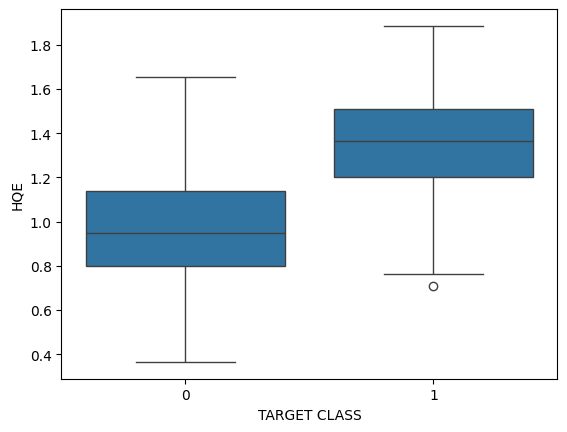

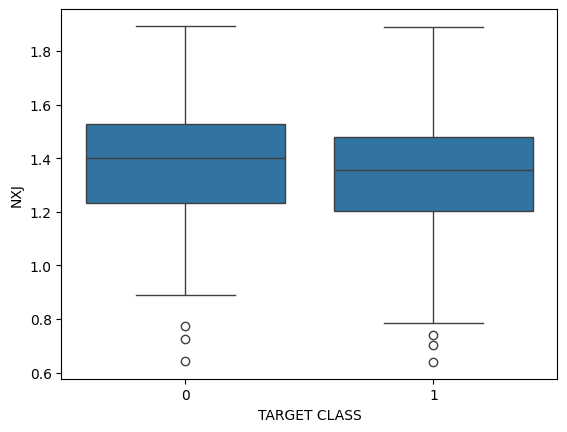

In [34]:
# your code starts here
for i in range(10):
  sns.boxplot(x='TARGET CLASS', y=df.columns[i], data=df)
  plt.show()
# your code ends here

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [35]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [36]:
# your code starts here
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
# your code ends here

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [37]:
# your code starts here
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()
# your code ends here

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [38]:
# Your code starts here.
X = df_feat
y = df['TARGET CLASS']
# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [39]:
# Your code starts here.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [40]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [41]:
# Your code starts here.
pred = knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [42]:
# Your code starts here.
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))
# Your code ends here

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [43]:
# Your code starts here.
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, pred), 3))

# Your code ends here

0.937


Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [44]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# Your code starts here.
accuracy = []

for k in range(1, 61):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, pred))

for j in range(60):
  print(f'Accuracy for k={j+1}: {round(accuracy[j], 3)}')
# Your code ends here

Accuracy for k=1: 0.937
Accuracy for k=2: 0.917
Accuracy for k=3: 0.943
Accuracy for k=4: 0.943
Accuracy for k=5: 0.943
Accuracy for k=6: 0.943
Accuracy for k=7: 0.937
Accuracy for k=8: 0.943
Accuracy for k=9: 0.943
Accuracy for k=10: 0.95
Accuracy for k=11: 0.95
Accuracy for k=12: 0.953
Accuracy for k=13: 0.953
Accuracy for k=14: 0.953
Accuracy for k=15: 0.953
Accuracy for k=16: 0.953
Accuracy for k=17: 0.953
Accuracy for k=18: 0.95
Accuracy for k=19: 0.947
Accuracy for k=20: 0.947
Accuracy for k=21: 0.95
Accuracy for k=22: 0.943
Accuracy for k=23: 0.943
Accuracy for k=24: 0.947
Accuracy for k=25: 0.94
Accuracy for k=26: 0.943
Accuracy for k=27: 0.947
Accuracy for k=28: 0.947
Accuracy for k=29: 0.95
Accuracy for k=30: 0.95
Accuracy for k=31: 0.95
Accuracy for k=32: 0.95
Accuracy for k=33: 0.95
Accuracy for k=34: 0.95
Accuracy for k=35: 0.95
Accuracy for k=36: 0.95
Accuracy for k=37: 0.95
Accuracy for k=38: 0.95
Accuracy for k=39: 0.95
Accuracy for k=40: 0.95
Accuracy for k=41: 0.95
Ac

**Plot a graph of K value vs Accuracy**

Text(0, 0.5, 'Accuracy')

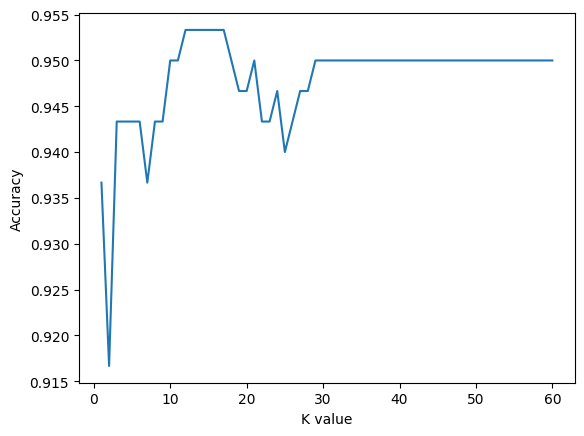

In [45]:
# Your code starts here.
sns.lineplot(x=list(range(1, 61)), y=accuracy)
plt.xlabel('K value')
plt.ylabel('Accuracy')
# Your code ends here

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [46]:
# Your code starts here.
n_acc_best = np.max(accuracy)
n_neigh_best = np.argmax(accuracy) + 1
print("Best value of n_neighbours:",n_neigh_best)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

Best value of n_neighbours: 12
Corresponding highest accuracy: 0.9533333333333334


In [ ]:
# Reasons:


# **Compulsory:**

Task 1 : You have to research and create a short blog on the topic of **Reinforcement Learning**.


Task 2 : You have to research and create a short blog on the topic of **Oversampling and Undersampling**.
Happy coding! :)

**What is Reinforcement Learning?**
- Reinforcement Learning is a type of machine learning where an agent learns to make decisions by interacting with an environment. The goal of the agent is to maximize a reward signal by choosing actions that lead to favorable outcomes over time.

- At its core, RL mimics the way humans and animals learn: through trial and error. For example, a toddler learning to walk might stumble several times (negative feedback) before mastering the skill and receiving praise or rewards (positive feedback).

**Key Components of Reinforcement Learning
Agent:**
- The decision-maker or learner (e.g., a robot or software program).
- Environment: The world with which the agent interacts (e.g., a game or real-world system).
- State: The current situation of the environment as perceived by the agent.
- Action: The choices the agent can make in any given state.
- Reward: The feedback signal that evaluates the agent's action (positive or negative).
- Policy: The strategy the agent uses to determine its actions.
- Value Function: Estimates the long-term benefit of states or actions to guide better decision-making.

**How Does RL Work?**

Reinforcement Learning operates through a loop of interaction:

- Observe: The agent perceives the current state of the environment.
- Act: Based on its policy, the agent selects an action.
- Receive Feedback: The agent gets a reward and transitions to a new state.
- Update: The agent adjusts its policy to improve future rewards.

Over time, the agent learns to associate certain actions with higher rewards, refining its strategy.


**Applications of Reinforcement Learning**

Reinforcement Learning is making waves across industries due to its versatility:

- Gaming: RL-powered agents like DeepMind’s AlphaGo have defeated world champions in games like Go and StarCraft.
- Robotics: Robots learn to perform tasks such as assembly, navigation, and object manipulation.
- Healthcare: RL optimizes treatment plans, drug discovery, and resource allocation in hospitals.
- Finance: Algorithms optimize trading strategies and manage investment portfolios.
- Autonomous Vehicles: RL helps self-driving cars navigate complex environments safely.




One common challenge faced by data scientists is dealing with imbalanced datasets, where one class significantly outweighs another. This imbalance can skew predictions and undermine the performance of your model. Enter oversampling and undersampling—two techniques to restore balance to your data and improve model accuracy.

**What is Data Imbalance?**

In machine learning, an imbalanced dataset means that the distribution of classes is not uniform. For instance, in a fraud detection problem, fraudulent transactions might make up only 1% of the dataset, while legitimate transactions account for the remaining 99%. When trained on such a dataset, a model might simply predict the majority class (legitimate transactions) most of the time, ignoring the minority class (fraud).

To address this issue, oversampling and undersampling are used to adjust the dataset to give both classes equal weight in the model’s training process.

#**Oversampling**

Oversampling involves increasing the representation of the minority class in the dataset. This can be achieved by either duplicating existing samples or generating synthetic ones.

Techniques for Oversampling:

- Random Oversampling:

Simply duplicates samples from the minority class until the class distribution is balanced.

Pros: Easy to implement.

Cons: Can lead to overfitting because the model sees identical data points repeatedly.

- SMOTE (Synthetic Minority Oversampling Technique):

Generates synthetic samples by interpolating between existing minority class samples.

Pros: Reduces overfitting compared to random oversampling.

Cons: May create unrealistic synthetic data if the minority class is poorly understood.


#**Undersampling**

Undersampling reduces the majority class by randomly removing samples, making it comparable in size to the minority class.

Techniques for Undersampling:

- Random Undersampling:

Removes a random subset of the majority class to balance the dataset.

Pros: Reduces computational cost and training time.

Cons: Risk of discarding useful data, potentially leading to loss of important patterns.

- Cluster-Based Undersampling:

Groups majority class samples into clusters and selects representative samples for training.

Pros: Retains diversity within the majority class while reducing size.

Cons: More computationally expensive than random undersampling.

**When to Use Oversampling vs. Undersampling**

- Small Datasets: Oversampling is preferred because undersampling might remove too much information from the majority class.
- Large Datasets: Undersampling can be effective since there is enough data to represent the majority class even after downsampling.
- Model Sensitivity: Some models, like decision trees, are less sensitive to class imbalance, whereas others, like logistic regression, may benefit more from these techniques.

**Real-World Applications**

- Fraud Detection: Detecting rare fraudulent transactions amidst a sea of legitimate ones.
- Healthcare: Identifying rare diseases or adverse reactions in medical datasets.
- Customer Retention: Predicting customer churn, where the number of customers leaving is much smaller than those staying.

**Conclusion**

Oversampling and undersampling are powerful tools for dealing with imbalanced datasets. By strategically adjusting the class distribution, you can create more robust and fair models that perform well across all classes. While these techniques are not one-size-fits-all, understanding their strengths and limitations will help you make informed decisions for your machine learning projects.

Balancing your data is not just a technical step—it’s a commitment to building models that truly understand the complexities of the problem they aim to solve.


# **End of Task**


